In [93]:
"""1 
Given: matrix A, vector bs
Required: Use LU decomposition with and without pivoting, then replace Uii with 1e-20
Equation: LU decomposition
"""

import numpy as np
from ludec import ludec, lusolve
from gauelim import gauelim
from triang import forsub, backsub, testcreate, testsolve


if __name__ == "__main__":    
    A = np.array([4., 4, 8, 4,
                  4, 5, 3, 7,
                  8, 3, 9, 9,
                  4, 7, 9, 5]).reshape(4,4)
    b = np.array([1., 2, 3, 4])

    print("Matrix A:\n", A)
    print("Vector b:", b)

#a LU decomposition without pivoting
#LU decomposition without pivoting code has been provided in Numerical Methods in Physics with 
#Python (2nd Ed.) by A. Gezerlis.
    x1 = lusolve(A, b)
    print("\nLU decomposition (no pivot):", x1)
    print("Check Ax:", A @ x1)

#b LU decomposition with pivoting
def ludec_pivot(A):
    n = A.shape[0]
    U = np.copy(A)
    L = np.identity(n)
    P = np.arange(n)

    for j in range(n-1):
        pivot_row = np.argmax(np.abs(U[j:, j])) + j
        
        if pivot_row != j:
            U[[j, pivot_row]] = U[[pivot_row, j]]
            P[[j, pivot_row]] = P[[pivot_row, j]]
            if j >= 1:
                L[[j, pivot_row], :j] = L[[pivot_row, j], :j]
        for i in range(j+1, n):
            coeff = U[i, j] / U[j, j]
            U[i, j:] -= coeff * U[j, j:]
            L[i, j] = coeff

    for i in range(n):
        L[i, i] = 1.0

    return P, L, U

def lusolve_pivot(A, b):
    P, L, U = ludec_pivot(A)
    b_permuted = b[P]
    y = forsub(L, b_permuted)
    x = backsub(U, y)
    return x

if __name__ == "__main__":    
    A = np.array([4., 4, 8, 4,
                  4, 5, 3, 7,
                  8, 3, 9, 9,
                  4, 7, 9, 5]).reshape(4,4)
    b = np.array([1., 2, 3, 4])
    
    x2=lusolve_pivot(A,b)
    print("\nLU decomposition (with pivot):", x2)
    print("Check Ax:", A @ x2)

#c Replace Uii with 1e-20
def ludec_replace(A):
    n = A.shape[0]
    U = np.copy(A)
    L = np.identity(n)

    for j in range(n-1):
        if abs(U[j, j]) < 1e-20:
            U[j, j] = 1e-20
        
        for i in range(j+1,n):
            coeff = U[i,j]/U[j,j]
            U[i,j:] -= coeff*U[j,j:]
            L[i,j] = coeff

    return L, U

def lusolve_replace(A,bs):
    L, U = ludec_replace(A)
    ys = forsub(L,bs)
    xs = backsub(U,ys)
    return xs

if __name__ == "__main__":    
    A = np.array([4., 4, 8, 4,
                  4, 5, 3, 7,
                  8, 3, 9, 9,
                  4, 7, 9, 5]).reshape(4,4)
    b = np.array([1., 2, 3, 4])
    
    x3=lusolve_replace(A,b)
    print("\nLU decomposition (without pivot, replaced):", x3)
    print("Check Ax:", A @ x3)

Matrix A:
 [[4. 4. 8. 4.]
 [4. 5. 3. 7.]
 [8. 3. 9. 9.]
 [4. 7. 9. 5.]]
Vector b: [1. 2. 3. 4.]

LU decomposition (no pivot): [nan nan inf inf]
Check Ax: [nan nan nan nan]

LU decomposition (with pivot): [ nan  inf -inf -inf]
Check Ax: [nan nan nan nan]

LU decomposition (without pivot, replaced): [nan nan inf inf]
Check Ax: [nan nan nan nan]


Pivoting, whether partial or complete, is not a universal solution for solving linear systems. Its primary purpose is to improve numerical stability during LU factorization, especially when the matrix has very small or poorly scaled pivots. However, pivoting cannot resolve fundamental issues such as singularity or inconsistency in the system. In addition, pivoting also reveals a zero pivot which will reveal that a matrix is rank deficient.

Matrix A is therefore rank deficient, and the system Ax=b may be inconsistent or underdetermined with no exact solution.

Replacing the zero pivot with a tiny number forces the algorithm to continue. While this produces a solution numerically, ithe tiny pivot magnifies errors and makes the solution unreliable. In addition, it also misrepresents the system, hiding the real problem that the system is inconsistent or singular.

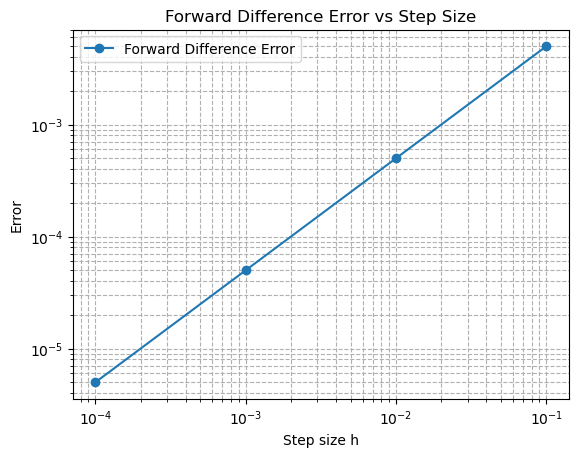

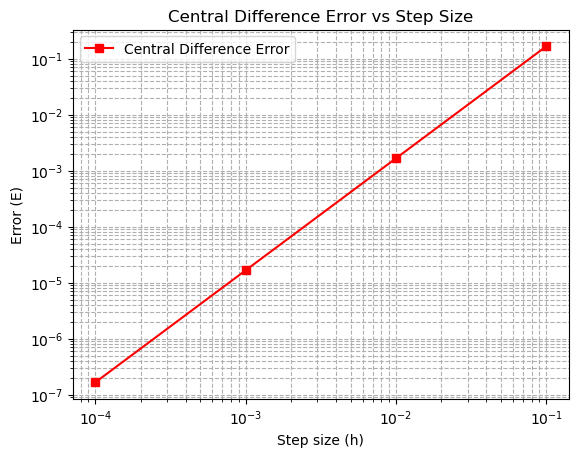

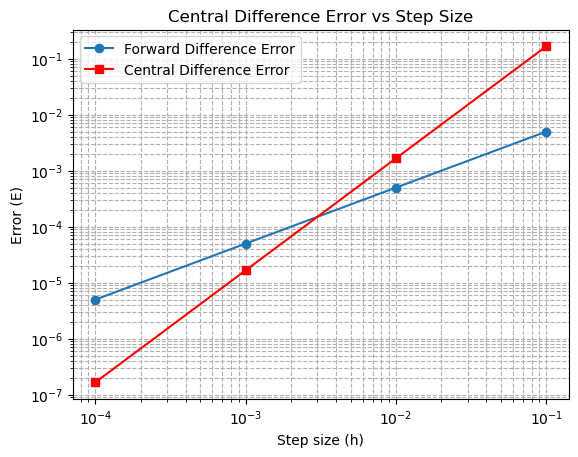

<Figure size 640x480 with 0 Axes>

In [72]:
""" 2
Given: analytical expectations for total error of (a) forward diff and (b) central diff; h =1e-1, 1e-2, 1e-3, 1e-4
f(x) = 1, f''(x) = 0.1, f'''(x) = 100
Required: plot for (a) and (b), one possible form of the function
Equation: total error equations
"""
import numpy as np
import matplotlib.pyplot as plt

f = 1 #f
f_2 = 0.1 #f''
f_3 = 100. #f'''
machine_eps = np.finfo(float).eps
h = np.logspace(-1, -4, 4)

#a Plot for forward difference
def fwd_error(h, f, f_2):
    E_fwd_app = (h / 2) * abs(f_2)     
    E_fwd_ro = (2 * abs(f) * machine_eps) / h 
    return E_fwd_app + E_fwd_ro         

E_fwd = fwd_error(h, f, f_2)

plt.loglog(h, E_fwd, 'o-', label="Forward Difference Error")
plt.xlabel('Step size (h)')
plt.ylabel('Error (E)')
plt.title("Forward Difference Error vs Step Size")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


#b Plot for central difference
def cen_error(h, f, f_3):
    E_cen_app = ((h**2) / 6) * abs(f_3)
    E_cen_ro = (abs(f) * machine_eps) / h
    return E_cen_app + E_cen_ro

E_cen = cen_error(h, f, f_3)

plt.loglog(h, E_cen, 's-', color='red', label="Central Difference Error")
plt.xlabel('Step size (h)')
plt.ylabel('Error (E)')
plt.title("Central Difference Error vs Step Size")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

#c combined plots
plt.loglog(h, E_fwd, 'o-', label="Forward Difference Error")
plt.loglog(h, E_cen, 's-', color='red', label="Central Difference Error")
plt.xlabel('Step size (h)')
plt.ylabel('Error (E)')
plt.title("Central Difference Error vs Step Size")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

The function shows that the central difference approximation's truncation error decreases faster as h gets smaller compared to the forward difference approximation. This is consistent with the expected truncation orders, where the forward difference has truncation error ~ _O(h)_ while the central difference has truncation error ~ _O(h<sup>2</sup>)_. Round-off is also demonstrated as both functions rise on the right side.

What is odd with this set-up is that the function f(x) is constant, meaning that all of its higher derivatives must be 0. In the problem, there were values given for its second and third derivative, which is what makes the set-up odd. In addition, increasing the number of points of h can more effectively show the trends of the approximations.

One possible form of the function is $\frac{100}{6}x^3 + \frac{1}{20}x^2 + x + 1$. 

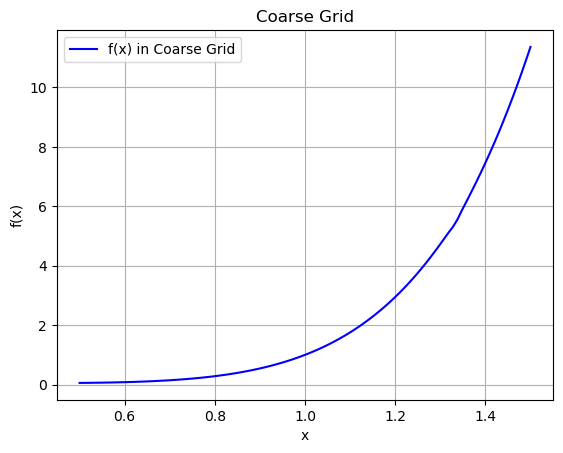

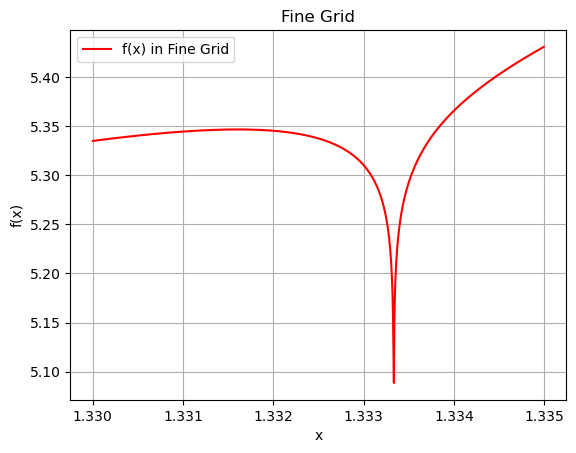

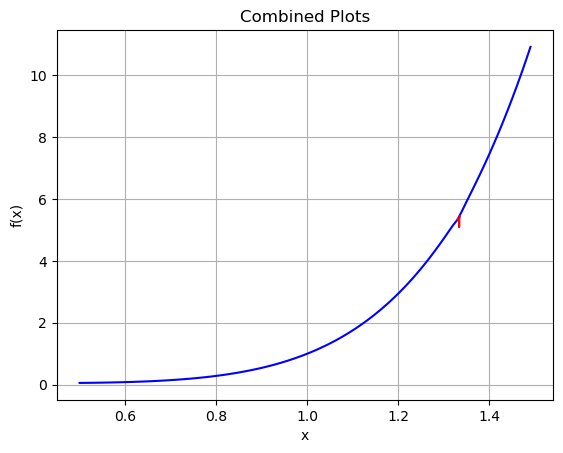

In [97]:
"""3
Given: function, x = 100 points from 0.5 to 1.5 
Required: plot function using matplotlib, then use much finer grid
Equation: matplotlib
"""

from math import log10
import matplotlib.pyplot as plt

def function(x):
    return x**6 + log10(abs(1. + 3.*(1.-x)))/10.
x_2 = [0.000005*i + 1.33 for i in range(1000)]
f_2 = [function(x) for x in x_2]


#a Plot for original grid x_1
def grid1(x):
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title("Function 1")
    plt.grid(True)

    x_1 = [0.5 + i for i in range(100)]
    f_1 = [function(x) for x in x_1]
    plt.plot(x_1, f_1,  'b-', label='f(x) in Coarse Grid')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title("Coarse Grid")
    plt.grid(True)
    plt.legend()
    plt.savefig("Coarse Grid")
    
    plt.show()

grid1(x_1)
    
#b Plot for finer grid x_2
def grid2(x):
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title("Function 2")
    plt.grid(True)

    x_2 = [0.000005*i + 1.33 for i in range(1000)]
    f_1 = [function(x) for x in x_2]
    plt.plot(x_2, f_2, 'r-', label='f(x) in Fine Grid')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title("Fine Grid")
    plt.grid(True)
    plt.legend()
    plt.savefig("Fine Grid")
    
    plt.show()
    
grid2(x_2)


#c combined plot
plt.plot(x_1, f_1, 'b-', label='f(x) in Coarse Grid')
plt.plot(x_2, f_2, 'r-', label='f(x) in Fine Grid')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Combined Plots")
plt.grid(True)
plt.savefig("Combined Plots")

Do you see a dip? Consider the function itself and reason about what you should be seeing. Discuss how you should then go about picking the grid granularity.

The dip can only be clearly seen in the finer grid near $x = 1.333$.

This is consistent with the behavior of the logarithm in the function, where if $\lvert 1 + 3(1-x) \rvert$ goes to zero, the log becomes very large. This happens when $x = 1.333$.

In choosing the grid granularity, the step size must be small enough to capture all information. To do this, one can follow the same steps done above where the position of the possible sharp change is first determined before refining locally to show the dip. 